In [37]:
import cv2
import numpy as np

In [38]:
def binary_image_inRange(image, lower_bound, upper_bound):
    mask = cv2.inRange(image, lower_bound, upper_bound)
    return mask

In [39]:
import matplotlib.pyplot as plt

image = cv2.imread('leukemia.jpg')
lower_bound = (107,0, 104)
upper_bound = (246, 91, 255)
    
mask = binary_image_inRange(image, lower_bound, upper_bound)
    
# Filtros espaciales
mask_median = cv2.medianBlur(mask, 3)

#morphological filters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#erosion
mask_erosion = cv2.erode(mask, kernel, iterations=1)

#dialtacion
mask_dilation = cv2.dilate(mask_erosion, kernel, iterations=1)

#closing, aperture -> buscar que son



# Find contours and draw them
contours, _ = cv2.findContours(mask_median, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0,255,0), 3)


#analize contours
if len(contours) > 0:
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        print(f"Bounding Rect of first contour: x={x}, y={y}, w={w}, h={h}")
        #draw rectangle
        cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    M = cv2.moments(largest_contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0
    print(f"Largest Contour Area: {area}")
    print(f"Largest Contour Perimeter: {perimeter}")
    print(f"Largest Contour Centroid: ({cx}, {cy})")




Bounding Rect of first contour: x=59, y=173, w=15, h=13
Bounding Rect of first contour: x=140, y=162, w=13, h=13
Bounding Rect of first contour: x=103, y=155, w=13, h=15
Bounding Rect of first contour: x=78, y=109, w=9, h=11
Bounding Rect of first contour: x=169, y=64, w=13, h=14
Bounding Rect of first contour: x=34, y=59, w=13, h=15
Largest Contour Area: 132.0
Largest Contour Perimeter: 42.97056233882904
Largest Contour Centroid: (174, 70)


In [40]:


def display_multiple_images(images, titles, figsize=(15, 5), is_gray=None):
    """
    Function to display multiple images in a row
    
    Parameters:
    - images: list of images to display
    - titles: list of titles for each image
    - figsize: size of the entire figure
    - is_gray: list of True/False for each image, or None for auto-detect
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    
    if n == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        if is_gray is None:
            # Auto-detect if grayscale
            gray_check = len(img.shape) == 2
        else:
            gray_check = is_gray[i] if isinstance(is_gray, list) else is_gray
        
        if gray_check or len(img.shape) == 2:
            axes[i].imshow(img, cmap='gray')
        else:
            if img.shape[2] == 3:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[i].imshow(img_rgb)
            else:
                axes[i].imshow(img)
        
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("✅ Image display functions created!")
print("Use display_image(your_image, 'Title') for single images")
print("Use display_multiple_images([img1, img2], ['Title1', 'Title2']) for multiple images")

✅ Image display functions created!
Use display_image(your_image, 'Title') for single images
Use display_multiple_images([img1, img2], ['Title1', 'Title2']) for multiple images


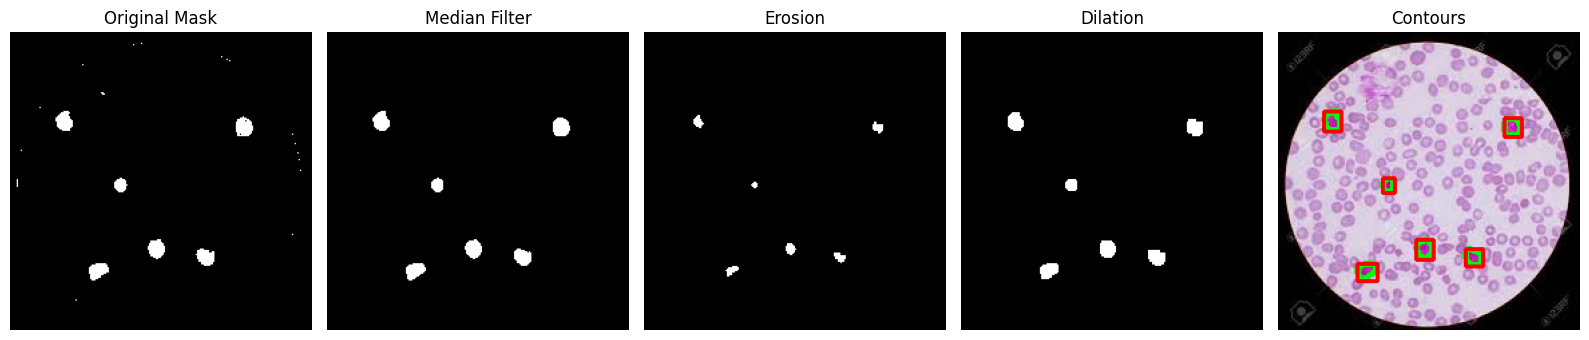

In [41]:

display_multiple_images(
    [mask, mask_median, mask_erosion, mask_dilation, image_with_contours],
    ["Original Mask", "Median Filter", "Erosion", "Dilation", "Contours"],
    figsize=(16, 4),
    is_gray=True
)